# **Discovering Socioeconomic Patterns in the Colombian GEIH**


# 2. Contextualization and Problem

## 2.1 Database Context
The GEIH (Gran Encuesta Integrada de Hogares) is a national survey conducted in Colombia that collects detailed information on households’ socioeconomic conditions and the labor market. It is implemented using a probabilistic, stratified sampling design—that is, the population is divided into groups (strata) sharing similar characteristics, and a random sample is drawn within each stratum to improve estimate precision and reduce sampling error.

This statistical approach yields representative estimates at the national, departmental, and municipal levels. The survey includes key variables such as income and expenditure, working hours, educational attainment, housing characteristics, labor status (formal or informal employment), pension access, and demographic data (e.g., number of children).

According to DANE, the purpose of this survey is:  
> “To provide statistical information related to the labor market, income and monetary poverty, as well as the socio-demographic characteristics of the population residing in Colombia.”

Finally, **the study universe** comprises the non-institutionalized civilian population living throughout the national territory (excluding certain areas such as Providencia and San Andrés). In this dataset, each observation (row) corresponds to a household, its dwelling, and the individuals within it.

## 2.2 Problem Description
The research problem consists of exploring how households’ final incomes are distributed in Colombia and determining how these relate to various socioeconomic and labor variables extracted from the GEIH. In particular, the goal is to identify distinguishing characteristics of high-income versus low-income households and to assess how these relationships vary across geographic regions. This will involve using measures of central tendency, dispersion, and position for the income variable, as well as creating interactive graphical analyses of the variables.

## 2.3 Guiding Question
**Which socioeconomic variables significantly differentiate high-income households from low-income households?**

Answering this question will enhance our understanding of income inequality dynamics in Colombian society and reveal which socioeconomic and labor factors are associated with higher or lower income levels. These insights could have important implications for public policy design by enabling more targeted government interventions.


# 3. Objectives

## 3.1. General Objective
To identify and characterize the socioeconomic profiles of Colombian households with the highest and lowest incomes by examining labor, educational, housing, and demographic variables extracted from the GEIH.

## 3.2. Specific Objectives
Our specific objectives are:

* **Analyze income distribution**: Compute measures of central tendency, dispersion, and position for Colombian households’ final incomes to define the ranges that distinguish high-income and low-income groups.

* **Examine labor, educational, and housing variables**: Investigate the relationship between income and labor, education, and housing variables to identify differentiating patterns between high-income and low-income households.

* **Explore geographic variations**: Compare the socioeconomic profiles of high-income and low-income households based on their geographic location to determine whether significant regional disparities exist.


# 4. Development
****


## 4.1. Libraries to be used

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd

## 4.2. Create the DataSet

In [ ]:
generales = pd.read_csv('Bases de datos\Características generales, seguridad social en salud y educación.CSV ', sep=";" ,encoding="latin-1")
laborales =pd.read_csv("Bases de datos\Ocupados.CSV" , sep=";" ,encoding="latin-1")
hogar = pd.read_csv("Bases de datos\Datos del hogar y la vivienda.CSV" , sep=";" ,encoding="latin-1")

### Building the revenue base

In [ ]:
laborales = laborales[['DIRECTORIO' , 'DPTO' , 'P6460' ,'P6440' ,'P6426' ,'INGLABO' ,'P6620S1','P6510S1',
                       'P6585S1A1' ,'P6585S2A1','P6585S3A1','P6585S4A1', 'P6545S1','P6580S1',
                       'P6630S1A1','P6630S2A1','P6630S3A1','P6630S4A1','P6800' ,'P6920' ,'P7140S7' ,'P514' , 'P7140S6', 'P7100']]


rename_mapping = {
    'DIRECTORIO':'Directorio',
    'DPTO':'Departamento',
    "P6440": "Tiene contrato",                        
    "P6460": "Tipo de contrato",                        
    "P6426": "Meses en la empresa",
    "INGLABO": "INGRESOS BASE",
    'P6620S1': 'Ingresos especie',
    'P6510S1': 'Ingresos extra',
    "P6585S1A1": "Auxilio alimentación",
    "P6585S2A1": "Auxilio Transporte",
    "P6585S3A1": "Subsidio Familiar",
    "P6585S4A1": "Subsidio Educativo",
    "P6545S1": "Primas",
    "P6580S1": "Bonificaciones",
    "P6630S1A1": "Prima servicios",
    "P6630S2A1": "Prima navidad",
    "P6630S3A1": "Prima vacaciones",
    "P6630S4A1": "Primas anuales",
    "P6800": "Horas de trabajo semanales",
    "P6920": "Fondo de pensiones",                     
    "P7140S7": "Exigencia física o mental",            
    "P514": "Trabajo estable",
    'P7140S6': "Desagrado por el trabajo",
    'P7100':'Horas Adicionales'                       
}

laborales.rename(columns=rename_mapping, inplace=True)

In [ ]:
variables_ingresos = [
    'Ingresos especie',
    'Ingresos extra',
    'Auxilio alimentación',
    'Auxilio Transporte',
    'Subsidio Familiar',
    'Subsidio Educativo',
    'Primas',
    'Bonificaciones',
    'Prima servicios',
    'Prima navidad',
    'Prima vacaciones',
    'Primas anuales'
]

laborales[variables_ingresos] = laborales[variables_ingresos].fillna(0)
laborales['Ingresos finales'] = laborales['INGRESOS BASE'] + laborales[variables_ingresos].sum(axis=1)

### Construction of the general characteristics database

In [ ]:
generales = generales[['DIRECTORIO' ,'P6090' ,'P3042']]

rename_mapping = {
    'DIRECTORIO':'Directorio',
    'P6090':'Sistema de Salud',
    "P3042": "Nivel Educativo",}

generales.rename(columns=rename_mapping, inplace=True)

### Building the home database

In [ ]:
hogar = hogar[['DIRECTORIO' , 'P6008' ,'P5090','P5100' , 'P5140']]

rename_mapping = {
    'DIRECTORIO':'Directorio',
    'P6008':'N_Personas',
    "P5090": "Tipo de Vivienda",
    'P5100': 'Cuota Amotrtizacion',
    'P5140': 'Arriendo'}

hogar.rename(columns=rename_mapping, inplace=True)

### Final Dataset:

In [15]:
df = hogar.merge(laborales, on='Directorio', how='inner').merge(generales, on='Directorio', how='inner')
df.drop(columns=variables_ingresos, inplace=True)
df.shape

(107056, 19)

Our sample has 107,819 rows, that is, families and people interviewed, and 17 variables that we consider the most interesting to interpret.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107056 entries, 0 to 107055
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Directorio                  107056 non-null  int64  
 1   N_Personas                  107056 non-null  int64  
 2   Tipo de Vivienda            107056 non-null  int64  
 3   Cuota Amotrtizacion         4150 non-null    float64
 4   Arriendo                    42313 non-null   float64
 5   Departamento                107056 non-null  int64  
 6   Tipo de contrato            40396 non-null   float64
 7   Tiene contrato              107056 non-null  int64  
 8   Meses en la empresa         107056 non-null  int64  
 9   INGRESOS BASE               102475 non-null  float64
 10  Horas de trabajo semanales  107056 non-null  int64  
 11  Fondo de pensiones          107056 non-null  int64  
 12  Exigencia física o mental   22816 non-null   float64
 13  Trabajo establ

In [17]:
df.head(7)

,Directorio,N_Personas,Tipo de Vivienda,Cuota Amotrtizacion,Arriendo,Departamento,Tipo de contrato,Tiene contrato,Meses en la empresa,INGRESOS BASE,Horas de trabajo semanales,Fondo de pensiones,Exigencia física o mental,Trabajo estable,Desagrado por el trabajo,Horas Adicionales,Ingresos finales,Sistema de Salud,Nivel Educativo
0,7713749,5,2,980000.0,NaN,5,NaN,2,24,1500000.0,48,2,NaN,1,NaN,NaN,1500000.0,1,5.0
1,7713749,5,2,980000.0,NaN,5,NaN,2,24,1500000.0,48,2,NaN,1,NaN,NaN,1500000.0,1,5.0
2,7713749,5,2,980000.0,NaN,5,NaN,2,24,1500000.0,48,2,NaN,1,NaN,NaN,1500000.0,1,9.0
3,7713749,5,2,980000.0,NaN,5,NaN,2,24,1500000.0,48,2,NaN,1,NaN,NaN,1500000.0,1,10.0
4,7713749,5,2,980000.0,NaN,5,NaN,2,24,1500000.0,48,2,NaN,1,NaN,NaN,1500000.0,1,5.0
5,7713749,5,2,980000.0,NaN,5,NaN,2,96,750000.0,48,2,NaN,1,NaN,NaN,750000.0,1,5.0
6,7713749,5,2,980000.0,NaN,5,NaN,2,96,750000.0,48,2,NaN,1,NaN,NaN,750000.0,1,5.0


## 4.3. Analysis of the variables of interest.
***

#### **Measures of Central Tendency for the Study Variable**

In [18]:
def medidas_tendencia(x):
    media = x.mean()
    mediana = x.median()
    mode_series = x.mode()
    if not mode_series.empty:
        moda = mode_series.iloc[0]
    else:
        moda = None
    df1 = pd.DataFrame({
        "Media": [round(media, 3)],
        "Mediana": [round(mediana, 3)],
        "Moda": [round(moda, 3)] if moda is not None else [None],
        'Datos en la moda': len(df[x==moda])})

    df1.index = ['Ingresos Finales']
    return df1

medidas_tendencia(df['Ingresos finales'])

,Media,Mediana,Moda,Datos en la moda
Ingresos Finales,2383671.953,1300000.0,1000000.0,4892


The first thing we can observe—and which is unsurprising in the Colombian context—is the marked right‐skew of the mean compared to the median. Specifically, the mean is 2,385,617 while the median is 1,300,000, indicating a significant rightward shift driven by a subset of Colombian households with exceptionally high incomes relative to the median.

It is important to note that this GEIH data corresponds to 2024, when the legal monthly minimum wage was 1,462,000. Thus, the median falls below the minimum wage, and the mode shows that the most frequently occurring values are also below this threshold. These central tendency measures suggest that over 50% of individuals in the sample earn less than the minimum wage; in fact, the most common income is 400,000 COP below what the State deems “necessary” for monthly living expenses.

All of this will become even clearer in the following histogram and boxplot of our income variable:


#### **Histogram for the Study Variable**

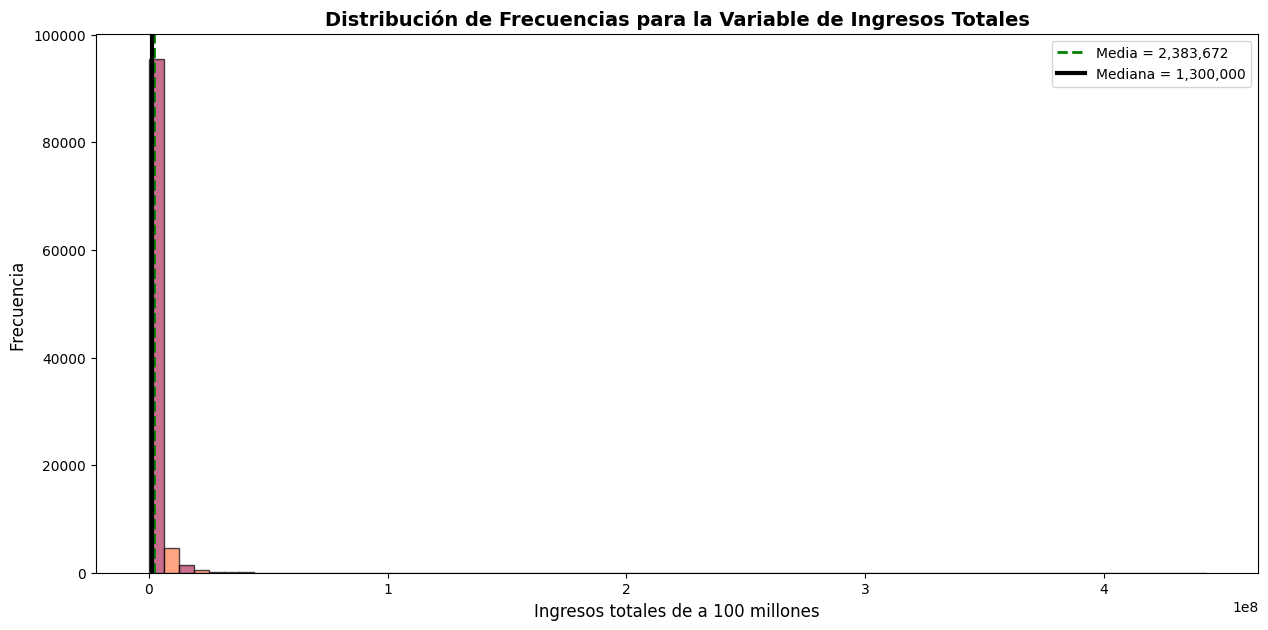

In [21]:
media_variable1 = df['Ingresos finales'].mean()
mediana_variable1 = df['Ingresos finales'].median()
color = ['#B03060', '#FF7F50']


fig, ax = plt.subplots(figsize=(15, 7))
n, bins, patches = ax.hist(df['Ingresos finales'], bins=70, alpha=0.7, edgecolor='black')

for i, patch in enumerate(patches):
    patch.set_facecolor(color[i % len(color)])

ax.axvline(x=media_variable1, color='green', linestyle='dashed', linewidth=2, label=f'Media = {media_variable1:,.0f}')
ax.axvline(x=mediana_variable1, color='black', linestyle='-', linewidth=3,  label=f'Mediana = {mediana_variable1:,.0f}')
ax.legend()
ax.set_title('Distribución de Frecuencias para la Variable de Ingresos Totales', fontsize=14, weight='bold')
ax.set_xlabel('Ingresos totales de a 100 millones', fontsize=12)
ax.set_ylabel('Frecuencia ', fontsize=12)
plt.show()

The analysis of this histogram aligns with our earlier observations: the distribution is highly right‐skewed, though only a few extreme values distort the mean. We can see that the maximum income reaches approximately 100 million COP, which underscores the vast gap between the center of the distribution—at or below the median—and the highest‐earning households in this sample.

The bins taper off beyond 0.2 (equivalent to 20 million), indicating very few households in the sample earn incomes near that level.

Finally, examining the largest bin reveals that 90,000 of the 100,000 observations fall within it. This is particularly concerning, as this bin lies below the median (and therefore below the legal minimum wage), a point we initially inferred from the measures of central tendency but now visually confirm.


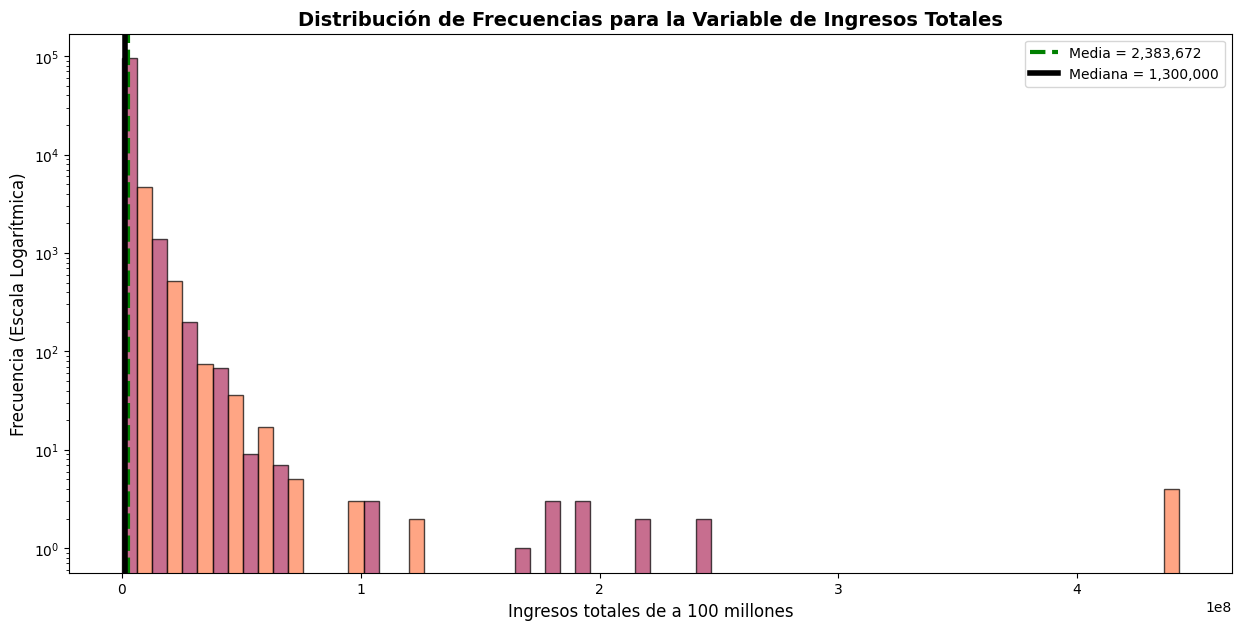

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))
n, bins, patches = ax.hist(df['Ingresos finales'], bins=70, alpha=0.7, edgecolor='black')

for i, patch in enumerate(patches):
    patch.set_facecolor(color[i % len(color)])

ax.axvline(x=media_variable1, color='green', linestyle='dashed', linewidth=3, label=f'Media = {media_variable1:,.0f}')
ax.axvline(x=mediana_variable1, color='black', linestyle='-', linewidth=4, label=f'Mediana = {mediana_variable1:,.0f}')
ax.legend()
ax.set_title('Distribución de Frecuencias para la Variable de Ingresos Totales', fontsize=14, weight='bold')
ax.set_xlabel('Ingresos totales de a 100 millones', fontsize=12)
ax.set_ylabel('Frecuencia (Escala Logarítmica)', fontsize=12)
ax.set_yscale('log')
plt.show()

In this chart, the y-axis is shown on a logarithmic scale to display all observations that were not visible in the previous plot.

However, interpretation is more challenging because the jumps between larger and smaller bins are much more pronounced than they appear visually. What we can observe is that there are non-zero counts of individuals in the sample earning between 100 and 400 million COP—most likely outliers.


#### **Measures of Dispersion for the Study Variable**

In [23]:
def medidas_dispercion(x):
  varianza = x.var()
  sd1 = x.std()
  rango = x.max() - x.min()
  cv = (sd1 / x.mean()) * 100


  df = pd.DataFrame({
        "Varianza": [round(varianza, 3)],
        "Desviación Estándar": [round(sd1, 3)],
        "Rango": [round(rango, 3)] ,
        "Coeficiente de Variación": [round(cv , 3)] , 
        "Mínimo" : [round(x.min())] , 
        "Máximo":[round(x.max())]})
  
  df.index = ['Ingresos Finales']
    
  return df

var = df[df['Ingresos finales'] > 5000]
medidas_dispercion(var['Ingresos finales'])

,Varianza,Desviación Estándar,Rango,Coeficiente de Variación,Mínimo,Máximo
Ingresos Finales,2.640324e+13,5138408.054,442593000.0,213.653,7000,442600000


The standard deviation—which, like the data, is expressed in COP—is 5,138,408.054. This means the standard deviation exceeds the mean, numerically confirming that income dispersion is enormous and that there are highly disproportionate salaries in Colombia, exacerbating inequality.

Meanwhile, the range is 442,593,000 COP, indicating a very wide variability interval. From the maximum and minimum, we see that some individuals earn as little as 7,000 COP per month, while some households “survive” on 442,600,000 COP monthly.

The maximum itself is not the core issue—every country has some residents with extremely high incomes (and this isn’t even the national maximum; it’s estimated that the top 0.005% earn more than 400 million COP per month). The real concern is the **minimum**, because far more people are clustered near this floor than near the sample’s maximum, meaning a much higher probability of living in extreme poverty than of achieving economic freedom.

Finally, the coefficient of variation—which measures relative dispersion compared to the mean—is 213.653, confirming that the standard deviation greatly exceeds the mean and indicating very high relative variability. This pattern typically appears in highly heterogeneous datasets or those containing significant outliers.



#### **Boxplot for the Study Variable**

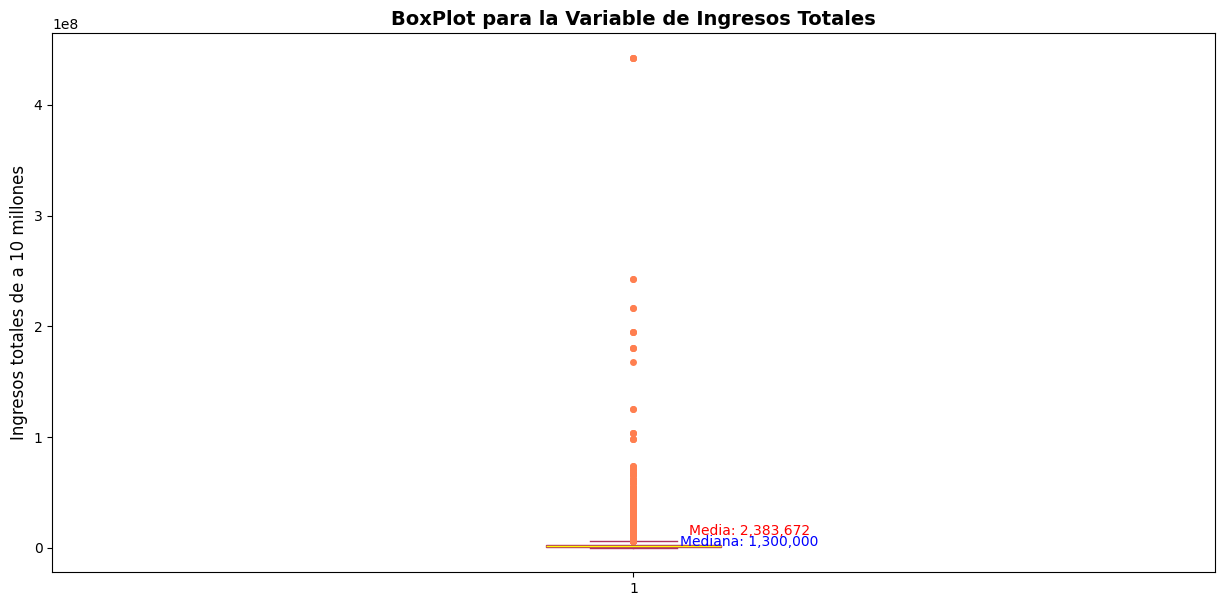

In [28]:

fig, ax = plt.subplots(figsize=(15, 7))

box = ax.boxplot(df['Ingresos finales'].dropna(), vert=True, patch_artist=True,
                  boxprops=dict(facecolor='#B03060', color='#B03060'),
                  medianprops=dict(color='yellow'),
                  whiskerprops=dict(color='#B03060'),
                  capprops=dict(color='#B03060'),
                  flierprops=dict(marker='o', markerfacecolor='#FF7F50', markersize=5, linestyle='none', markeredgecolor='none'))

ax.set_title('BoxPlot para la Variable de Ingresos Totales', fontsize=14, weight='bold')
ax.set_ylabel('Ingresos totales de a 10 millones', fontsize=12)
ax.text(1.1, df['Ingresos finales'].mean() + (df['Ingresos finales'].mean() * 4), f'Media: {media_variable1:,.0f}', horizontalalignment='center', color='red', fontsize=10)
ax.text(1.1, df['Ingresos finales'].median(), f'Mediana: {mediana_variable1:,.0f}', horizontalalignment='center', color='blue', fontsize=10)
plt.show()

Actually, this boxplot reveals little information due to the extremely dispersed scale of the data. The only notable feature is the very large number of outliers (which we will calculate later). In this case, it is ideal to display the boxplot using a logarithmic scale.


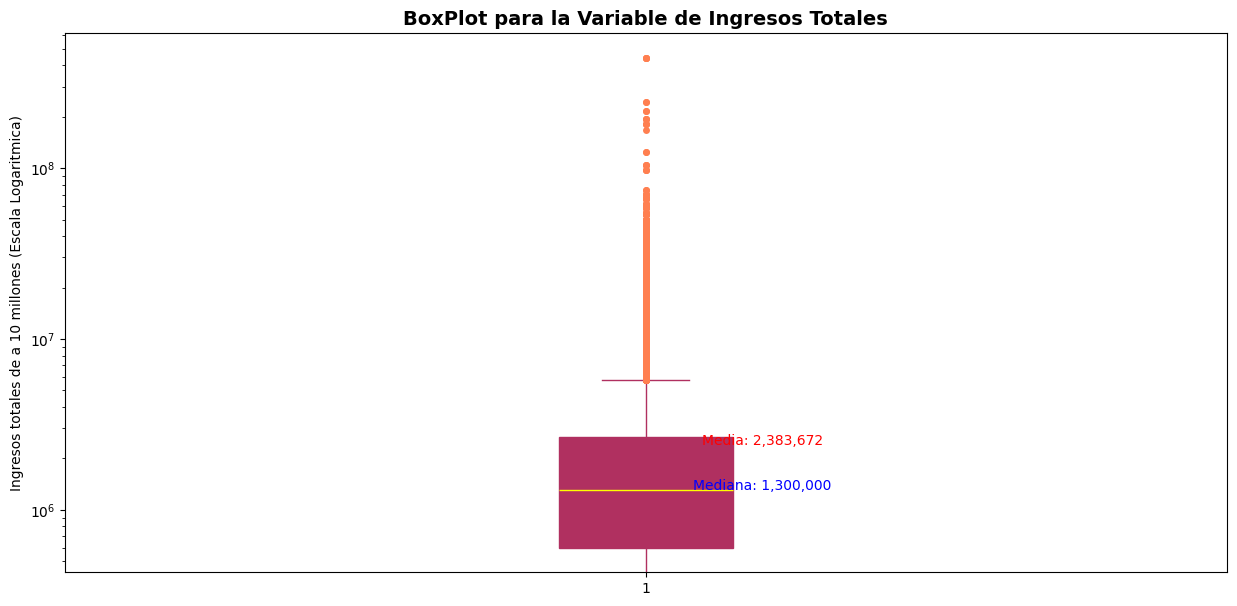

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))

box = ax.boxplot(df['Ingresos finales'].dropna(), vert=True, patch_artist=True,
                  boxprops=dict(facecolor='#B03060', color='#B03060'),
                  medianprops=dict(color='yellow'),
                  whiskerprops=dict(color='#B03060'),
                  capprops=dict(color='#B03060'),
                  flierprops=dict(marker='o', markerfacecolor='#FF7F50', markersize=5, linestyle='none', markeredgecolor='none'))

ax.set_title('BoxPlot para la Variable de Ingresos Totales', fontsize=14, weight='bold')
ax.set_ylabel('Ingresos totales de a 10 millones (Escala Logaritmica)', fontsize=10)
ax.text(1.1, df['Ingresos finales'].mean() + (df['Ingresos finales'].mean() * 0.01), f'Media: {media_variable1:,.0f}', horizontalalignment='center', color='red', fontsize=10)
ax.text(1.1, df['Ingresos finales'].median(), f'Mediana: {mediana_variable1:,.0f}', horizontalalignment='center', color='blue', fontsize=10)
ax.set_yscale('log')
plt.show()

Here we can more clearly see the box and whiskers of the plot. Again, we observe the skew between the median and the mean; we also notice that the lower whisker extends to the bottom of the chart, indicating that several households in the sample have incomes below the extreme poverty line.

Another notable feature is that the mean sits near the upper edge of the box (which represents the third quartile, \(Q3\)). Visually, this shows that 75% of individuals earn less than 2.3 million COP per month—a situation that can be critically challenging depending on household size. A family of three or more often struggles to live decently on just 2.3 million COP monthly. We will examine this further when discussing positional measures.


#### **Chebyshev's Theorem and Empirical Rule**

In [30]:
media = df['Ingresos finales'].mean()
desv = df['Ingresos finales'].std()

primer_intervalo = len(df[(df['Ingresos finales']> media-desv) & (df['Ingresos finales']< media+desv)])
segundo_intervalo = len(df[(df['Ingresos finales']> media- 2* desv) & (df['Ingresos finales']< media+ 2* desv)])
tercer_intervalo = len(df[(df['Ingresos finales']> media- 3* desv) & (df['Ingresos finales']< media+ 3* desv)])

print('A una desviación estándar hay:' , primer_intervalo, 'Datos' '\n' 'A dos desviaciones estándar hay:' , segundo_intervalo, 'Datos' 
          '\n' 'A tres desviaciones estándar hay:' , tercer_intervalo)

tupla = primer_intervalo /df['Ingresos finales'].shape[0] , segundo_intervalo / df['Ingresos finales'].shape[0] , tercer_intervalo/ df['Ingresos finales'].shape[0]
print(f'Esto en porcentajes del total es:{tupla}')

A una desviación estándar hay: 96754 Datos
A dos desviaciones estándar hay: 100115 Datos
A tres desviaciones estándar hay: 101328
Esto en porcentajes del total es:(0.9037699895381857, 0.935164773576446, 0.9464952921835301)


***

Lo que podemos observar es que, aunque la forma en el histograma se vea sumamente sesgada, la desviación es tan grande que se cumple el Teorema de Chebyshev, el cual establece que, para cualquier distribución con varianza finita, la proporción de valores que se encuentran a más de *k* desviaciones estándar de la media es, como máximo, $\frac{1}{k^2}$. En otras palabras:

$$
P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}
$$

Esto implica que al menos $1 - \frac{1}{k^2}$ de los datos se encuentran dentro del intervalo:

$$
[\mu - k\sigma, \mu + k\sigma]
$$

Por ejemplo:
* Para $k = 2$, al menos $1 - \frac{1}{4} = 75\% $ de los datos están dentro de 2 desviaciones estándar de la media.
* Para $k = 3$, al menos $1 - \frac{1}{9} \approx 88.9\% $ de los datos están dentro de 3 desviaciones estándar de la media.
***
Lo que comparando con los datos que nos dieron para $k= 2 = 0.93$ y $k= 3 = 0.94$ confirma que se cumple este teorema

Si hablamos de la regla empírica podemos ver que solamente se cumple para el intervalo a una desviación estándar, esto nos muestra que la forma de esta distribución, empíricamente, no es de tipo montículo.

Por último, vemos que aproximadamente el 7% de los datos están a más de 3 desviaciones estándar, estos datos son valores atípicos sumamente fuertes y correspondan a las familias que más ganan en la muestra.. 

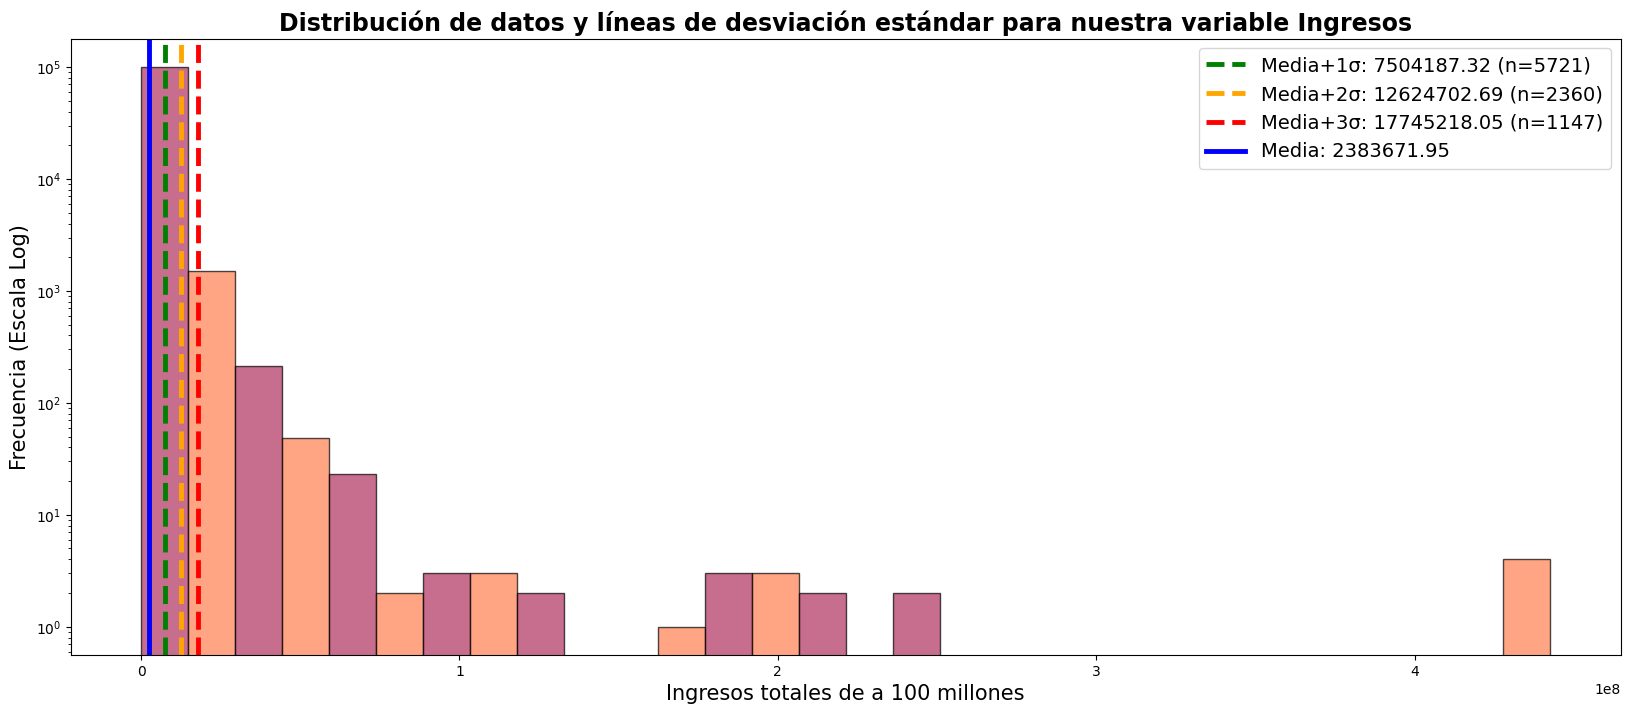

In [32]:

limite1 = media + 1 * desv
limite2 = media + 2 * desv
limite3 = media + 3 * desv

conteo1 = len(df[df['Ingresos finales'] > limite1])
conteo2 = len(df[df['Ingresos finales'] > limite2])
conteo3 = len(df[df['Ingresos finales'] > limite3])
colors = ['#B03060', '#FF5733', '#C70039', '#900C3F', '#581845']


plt.figure(figsize=(20, 8))
n, bins, patches = plt.hist(df['Ingresos finales'], bins=30, edgecolor='black', alpha=0.7)
for i, patch in enumerate(patches):
    patch.set_facecolor(color[i % len(color)])

plt.axvline(limite1, color='green', linestyle='--', linewidth=3.5, label=f'Media+1σ: {limite1:.2f} (n={conteo1})')
plt.axvline(limite2, color='orange', linestyle='--', linewidth=3.5, label=f'Media+2σ: {limite2:.2f} (n={conteo2})')
plt.axvline(limite3, color='red', linestyle='--', linewidth=3.5, label=f'Media+3σ: {limite3:.2f} (n={conteo3})')
plt.axvline(media, color='blue', linestyle='-', linewidth=3.5, label=f'Media: {media:.2f}')

plt.title('Distribución de datos y líneas de desviación estándar para nuestra variable Ingresos', fontsize=17, weight='bold')
plt.xlabel('Ingresos totales de a 100 millones' , fontsize=15 )
plt.ylabel('Frecuencia (Escala Log)' , fontsize=15 )
plt.yscale('log')
plt.legend(fontsize=14)

plt.show()

In this chart, we display the distribution of total household incomes (in units of 10 million COP) on a logarithmic frequency scale. The vertical lines denote:

- **Mean (blue)** at 2,383,671.95 COP  
- **Mean + 1 σ (green dashed)** at 7,504,187.32 COP (n = 5,721)  
- **Mean + 2 σ (yellow dashed)** at 12,624,702.69 COP (n = 2,360)  
- **Mean + 3 σ (red dashed)** at 17,745,218.05 COP (n = 1,147)  

Key observations:

1. **Heavy concentration below the mean:** The vast majority of households earn less than the average income—most observations cluster in the first one or two bins.  
2. **Rapid drop‐off:** Frequencies decline sharply as incomes rise, evidenced by the steep descent on the log‐scaled axis.  
3. **Few high‐income outliers:** Only a small fraction of households exceed the mean + 2 σ threshold, and even fewer surpass mean + 3 σ, underscoring the extreme upper tail of the distribution.  
4. **Long right tail:** The sparse, yet non‐zero counts in the higher bins highlight the presence of very high‐income households that drive the positive skew.

Overall, the chart underscores a highly right‐skewed income distribution with most households earning well below the mean and only a handful of extreme outliers pushing the average upward.


#### **Normality Test with Q-Q Plot**

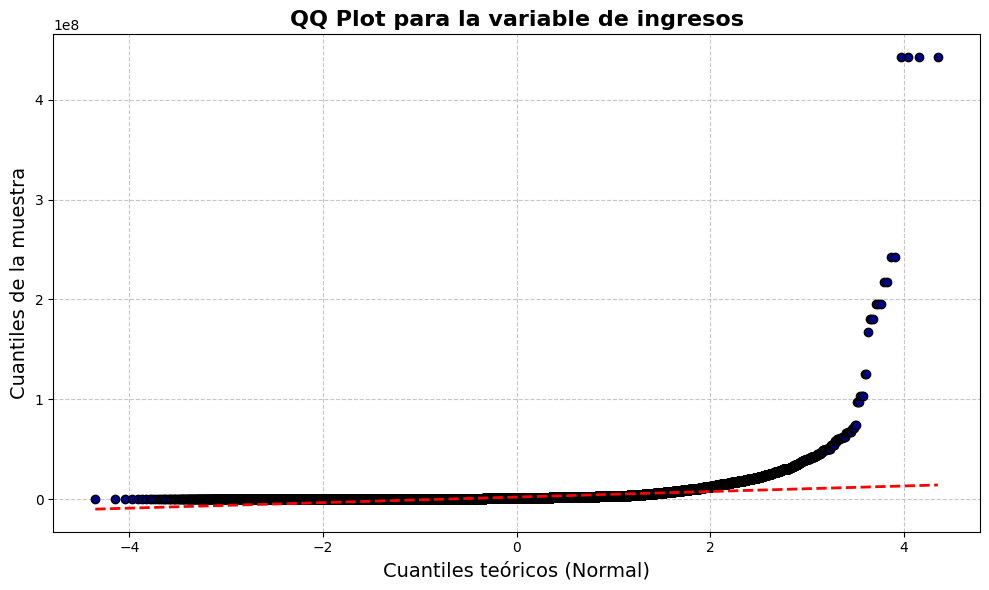

In [33]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(10, 6))
res = stats.probplot(df['Ingresos finales'].dropna(), dist="norm", plot=ax)

points = ax.get_lines()[0]
points.set_marker('o')
points.set_markerfacecolor('darkblue')
points.set_markeredgecolor('black')
points.set_linestyle('')  

line = ax.get_lines()[1]
line.set_color('red')
line.set_linewidth(2)
line.set_linestyle('--')

ax.set_title("QQ Plot para la variable de ingresos", fontsize=16, weight='bold')
ax.set_xlabel("Cuantiles teóricos (Normal)", fontsize=14)
ax.set_ylabel("Cuantiles de la muestra", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

With this Q‑Q plot, along with the scatter plots and boxplots, we can get a preliminary indication that the income variable does not follow a normal distribution. However, it is important to perform a hypothesis test to numerically verify these findings.


#### **D'Agostino-Pearson hypothesis test**

This test follows the hypothesis framework:

$$
H_0: \text{The data follow a normal distribution.}
$$

$$
H_1: \text{The data do not follow a normal distribution.}
$$


In [34]:
import scipy.stats as stats

stat, p_value = stats.normaltest(df['Ingresos finales'].dropna())

print(f'Estadístico de prueba: {stat:.3f}')
print(f'p-valor: {p_value:.3f}')


Estadístico de prueba: 281043.552
p-valor: 0.000


Since the p-value is below any conventional significance level (1%, 5%, or 10%), we can conclude that there is insufficient statistical evidence to accept the null hypothesis. Consequently, we determine that the income variable does not follow a normal distribution.


#### **Position Measures**

In [35]:
def medidas_posicion(x):
  q1  , q2 , q3= x.quantile(0.25) ,x.quantile(0.5) ,x.quantile(0.75)
  iqr = q3 - q1
  limite = q3 + 1.5 * iqr 

  final = pd.DataFrame({"Primer cuartil" : [round(q1, 3)] ,
           "Segundo cuartil" : [round(q2, 3)] ,
           "Tercer cuartil" : [round(q3, 3)] ,
           "IQR" : [round(iqr, 3)], 
           "Limite superior" : [round(limite, 3)]})
  final.index = ['Ingresos Finales']

  return final
 
medidas_posicion(df['Ingresos finales'])

,Primer cuartil,Segundo cuartil,Tercer cuartil,IQR,Limite superior
Ingresos Finales,600000.0,1300000.0,2662000.0,2062000.0,5755000.0


First, we observe that 25% of respondents earn less than COP 650,000. The second quartile corresponds to the median, reinforcing our earlier central-tendency analysis: 50% of respondents earn below the minimum wage.

This is concerning, as it is well known that a single minimum wage is typically insufficient for a dignified quality of life and leisure time. Out of those earning around COP 1,300,000, it is likely that between 25% and 50% of their income (i.e., between COP 268,000 and COP 610,000, depending on location) is spent on rent or housing-related payments.


In [36]:
round(df['Cuota Amotrtizacion'].median(),3) , round(df['Arriendo'].median(),3)

(655000.0, 500000.0)

In [61]:
df[df['Cuota Amotrtizacion'].notna()]['Ingresos finales'].median()

2700000.0

In [40]:
df[df['Arriendo'] == 500000.0]['Ingresos finales'].median()

1400000.0

What we see with the first line of code is, on average, the amount spent each month on the mortgage amortization payment (for those with a home loan) and on rent.

As mentioned earlier, homeowners must allocate COP 677,000 for their monthly mortgage payment, which represents over 32 % of income if we assume an average earnings of COP 2,700,000 (as shown in the second line of code).

Meanwhile, renting families have to dedicate approximately 37 % of their income to cover rent, assuming an income of COP 1,400,000 (as shown in the final line of code).

In both scenarios, after housing—which is a compulsory expense for all families—the actual remaining income for food, education, transportation, healthcare, utilities, etc., is at best COP 1,500,000 and at worst COP 900,000.

This is especially alarming when we consider that most of these households are not single-person units and that COP 900,000 must stretch to cover more than one individual.


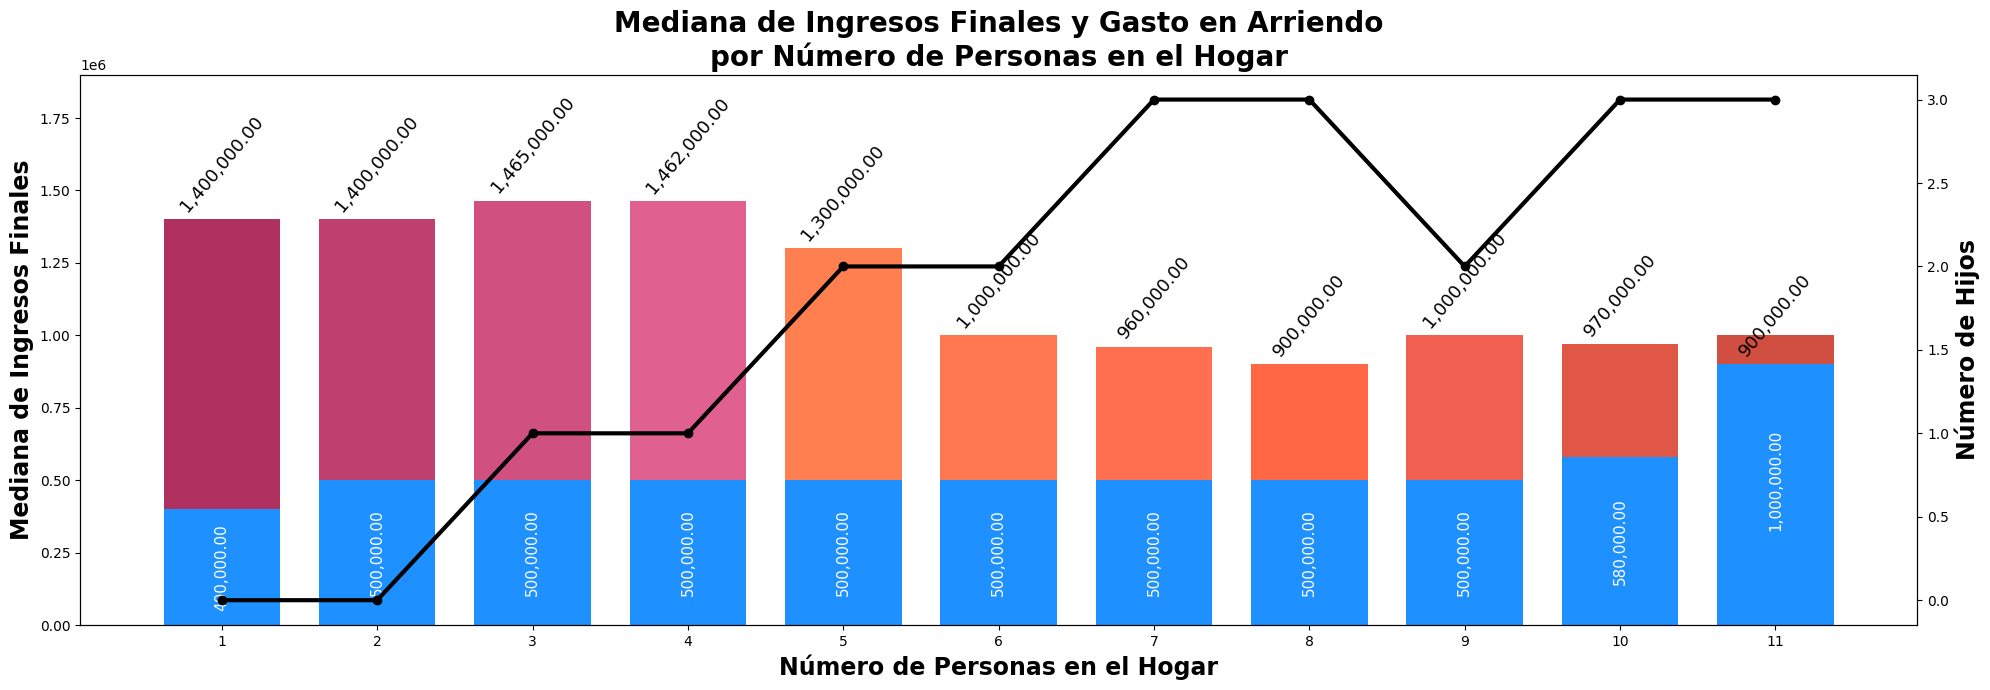

In [44]:
df_ingresos = df.groupby('N_Personas')[['Ingresos finales']].median().reset_index()
df_arriendo = df.groupby('N_Personas')[['Arriendo']].median().reset_index()

df_ingresos = df_ingresos[df_ingresos['N_Personas'] < 12].sort_values('N_Personas')
df_arriendo = df_arriendo[df_arriendo['N_Personas'] < 12].sort_values('N_Personas')

df_merged = pd.merge(df_ingresos, df_arriendo, on='N_Personas')
df_merged['Otros'] = df_merged['Ingresos finales'] - df_merged['Arriendo']

palette = [
    '#B03060', '#C04070', '#D05080', '#E06090',  
    '#FF7F50', '#FF7750', '#FF6F50', '#FF6745',
    '#F05F50', '#E05845', '#D04F40', '#C04835',
    '#B04030', '#A03828'
]

hijos = np.array([0, 0, 1, 1, 2, 2, 3, 3, 2, 3,3])
personas = range(1, 15)

fig, ax1 = plt.subplots(figsize=(20, 7))
ax1.bar(df_merged['N_Personas'], df_merged['Arriendo'],
        color='dodgerblue', width=0.75, label='Gasto en Arriendo')
ax1.bar(df_merged['N_Personas'], df_merged['Otros'],
        bottom=df_merged['Arriendo'], color=palette, width=0.75, label='Otros Ingresos')

ax1.tick_params(axis='y')
ax1.set_xticks(personas)
ax1.set_xticklabels(personas)
ax1.set_ylim(0, 1900000)
ax1.set_xlabel('Número de Personas en el Hogar', fontsize=17, weight='bold')
ax1.set_ylabel('Mediana de Ingresos Finales', fontsize=17, weight='bold')
ax1.set_title('Mediana de Ingresos Finales y Gasto en Arriendo\npor Número de Personas en el Hogar', fontsize=20, weight='bold')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(df_merged['N_Personas'], hijos, color='black', marker='o', linewidth=3, label='Número de Hijos')
ax2.set_ylabel('Número de Hijos', fontsize=17, weight='bold')
ax2.tick_params(axis='y')
ax2.grid(False)

y_offset = df_merged['Ingresos finales'].max() * 0.01  
for x, total, arriendo_val in zip(df_merged['N_Personas'], 
                                  df_merged['Ingresos finales'], 
                                  df_merged['Arriendo']):
    ax1.text(x, total + y_offset, f'{total:,.2f}', 
             ha='center', va='bottom', fontsize=13, color='black', rotation=50)

    ax1.text(x, arriendo_val/2, f'{arriendo_val:,.2f}', 
             ha='center', va='center', fontsize=11, color='white', rotation=90)

plt.tight_layout()
plt.show()

This chart is truly striking and worrisome. We can observe that as the number of household members increases, total income decreases. The chart really speaks for itself, and it raises the question: how does a family of five manage to survive on COP 1.3 million per month?

This result is even more troubling when we consider that more people in the household typically means more children. So, how does a household of six sustain itself and support two children on COP 1.2 million per month? What could become of these children’s university prospects if this situation persists?


In [62]:
len(df[(df['Ingresos finales'] < 1400000.0) & (df['N_Personas'] > 2)])

45092

Of the 100,000 individuals in the sample, 45,000 earn less than the legal minimum wage and live in households with more than two members. This means that, out of the 900,000 COP remaining after paying rent, they must cover higher utility bills, larger food expenses, medical care for multiple people, and other costs. In these cases, it is most likely that families cut back on food, resulting in insufficient quantity and quality of nutrition needed for good health.

All of this ignores the fact that, if there are children, money must also be set aside for education; or, if there is a baby, to cover all the requirements and care that an infant demands. Additionally, this analysis does not account for expenses such as debt repayments, vehicle costs, supporting an elderly relative, or special care and medications required by any household member due to illness.

What we are witnessing is truly a case of acute poverty in the country, where the majority of income is devoted to basic sustenance, with no opportunity for leisure, investment, or savings.

Continuing with the quartile analysis, we observe that there is a difference of just over 1.2 million COP between the second and third quartiles, which leads us to conclude that 75% of respondents earn less than 2.7 million COP per month. Although this figure exceeds the minimum wage, when accounting for expenses in households with more than three people, such an income is still typically insufficient to cover all needs without making some cuts.

Finally, by contrast, we see that the threshold for outlier status is 5,925,000 COP. This shatters any hope, as it implies that in Colombia, “upper‐class” households are those earning more than 5 million COP per month—an amount very few actually achieve.

Now, let us determine how many individuals are classified as outliers and compute their corresponding z‐scores.


#### **Outliers and Z score**

In [63]:
q1 = df['Ingresos finales'].quantile(0.25)
q3 = df['Ingresos finales'].quantile(0.75)
iqr = q3 - q1 

Economics1 = df[df['Ingresos finales'] > q3 + 1.5*iqr][['Ingresos finales']].reset_index().drop(columns='index')
Economics1['Zscore'] = (Economics1['Ingresos finales'] - df['Ingresos finales'].mean()) / df['Ingresos finales'].std()
Economics1.sort_values('Ingresos finales')

,Ingresos finales,Zscore
3412,5760000.0,0.659373
3411,5760000.0,0.659373
6891,5760000.0,0.659373
1255,5760000.0,0.659373
1254,5760000.0,0.659373
...,...,...
4249,242500000.0,46.893000
1355,442600000.0,85.971098
1354,442600000.0,85.971098
1357,442600000.0,85.971098


Here we can see that there are 8,000 outliers based on the IQR criterion. However, one issue is that the first outlier has a low z-score; in fact, the z-score of the first outlier is only 0.96. This occurs because the IQR method is highly sensitive to dispersion in the central part of the data, and as we observed in the histogram and central tendency measures, this variable exhibits significant central dispersion.

Moreover, it is striking that some values are so extreme they lie 27 standard deviations from the mean. To better understand the meaning of the z-score, let’s filter for values greater than 2.


In [64]:
Economics1[Economics1['Zscore'] >2].sort_values('Zscore')

,Ingresos finales,Zscore
6403,12648000.0,2.004550
6404,12648000.0,2.004550
6405,12648000.0,2.004550
6406,12648000.0,2.004550
5835,12700000.0,2.014705
...,...,...
4249,242500000.0,46.893000
1357,442600000.0,85.971098
1356,442600000.0,85.971098
1355,442600000.0,85.971098


In this case, we can observe that there are only 2,300 outliers. According to this criterion, outlier status begins at a monthly income of 12.4 million COP.

Nevertheless, these outliers highlight the extreme inequality present in the sample and, by extension, in the country. As mentioned earlier, the existence of wealthy individuals is not problematic in itself—there will always be rich people and income inequality in any nation. The real issue arises when such inequality is accompanied by entrenched structural poverty (social inequality); that is, when the minimum wage—or the income level at which the majority clusters—is insufficient for a dignified living, saving, and improving one’s situation. In that context, income inequality would not be as troubling as what we are observing here, but as we have analyzed, the situation is much worse.

This leaves us with a scenario in which 90% of the individuals in the sample lack the means to live “dignified” economic lives, while a small group has all the opportunities. In summary, we face a vicious cycle that affects the country’s most vulnerable population.


#### **Shape Measurements**

In [65]:
def medidas_formas(x):
  simetria = x.skew()
  kur = x.kurt()

  final = pd.DataFrame({"Simetría": [round(simetria , 3)],
           "Kurtosis": [round(kur  , 3)]})
  final.index = ['Ingresos Finales']
  return final

medidas_formas(df['Ingresos finales'])

,Simetría,Kurtosis
Ingresos Finales,34.224,2426.516


Finally, the shape measures confirm what we already knew: the distribution is extremely right-skewed, with a skewness of 34.2.

The distribution is also very peaked; technically, it is leptokurtic since its kurtosis is greater than 3.


### 4.3.2 **Examine employment, education, and housing variables for distinct patterns across income levels.**

First, we need to establish the thresholds for lower, middle, and upper classes:

To do this, we will use DANE data on class proportions in Colombia. Based on this, for 2024 we have:

* 60% Lower Class  
* 35% Middle Class  
* 5% Upper Class  


In [66]:
df['Ingresos finales'].quantile(0.60)

1600000.0

The lower class will be all people who have less than $1,680,000$:

In [67]:
df['Ingresos finales'].quantile(0.95)

8000000.0

The middle class is all those who earn more than $1,680,000$ but less than $8,000,000$.

The upper class all those who earn more than $8400000.0$.

The reason we construct our labels this way is because the official DANE thresholds are as follows:

* **Extreme poverty:** Per capita monthly income below 160,302 COP  
* **Monetary poverty:** Per capita monthly income below 420,676 COP  
* **Vulnerable class:** Per capita monthly income between 420,676 COP and 781,120 COP  
* **Middle class:** Per capita monthly income between 781,120 COP and 4,206,033 COP  
* **Upper class:** Per capita monthly income above 4,206,033 COP  

These thresholds are inferred statistically for the entire population, and if we applied them directly to our sample, the class proportions would not hold—for example, we would classify far too many households as upper class, distorting our objectives.

Nevertheless, we will include the **Monetary Poverty** category as all those earning less than 420,000 COP per month.


In [69]:
intervalos = [0, 420000, 1680000.0 ,  8400000.0, float('inf')]
nombres = ['Pobreza Monetaria' ,'Clase Baja' ,'Clase media', 'Clase alta']
df['CLASE_SOCIAL'] = pd.cut(df['Ingresos finales'], bins=intervalos, labels=nombres, right=False)
df['CLASE_SOCIAL'].value_counts()

CLASE_SOCIAL
Clase Baja           46922
Clase media          34956
Pobreza Monetaria    15714
Clase alta            4883
Name: count, dtype: int64

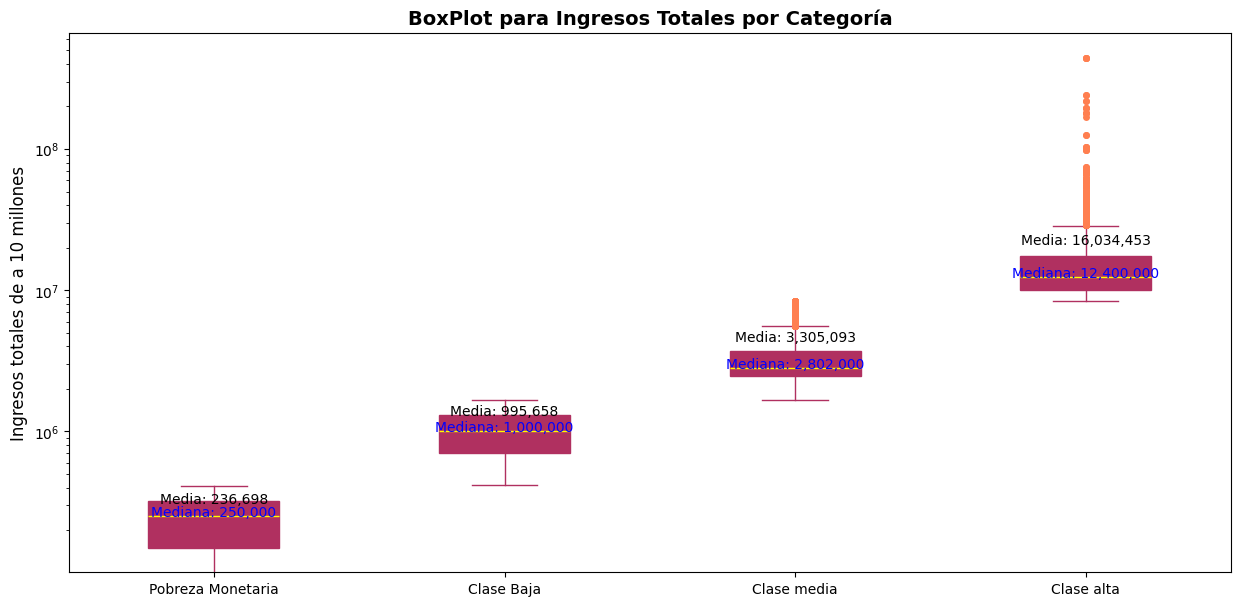

In [70]:

data = [df.loc[df['CLASE_SOCIAL'] == cat, 'Ingresos finales'].dropna() for cat in nombres]

fig, ax = plt.subplots(figsize=(15, 7))

box = ax.boxplot(data, vert=True, patch_artist=True,
                 boxprops=dict(facecolor='#B03060', color='#B03060'),
                 medianprops=dict(color='yellow'),
                 whiskerprops=dict(color='#B03060'),
                 capprops=dict(color='#B03060'),
                 flierprops=dict(marker='o', markerfacecolor='#FF7F50', markersize=5, linestyle='none', markeredgecolor='none'))

ax.set_title('BoxPlot para Ingresos Totales por Categoría', fontsize=14, weight='bold')
ax.set_ylabel('Ingresos totales de a 10 millones', fontsize=12)

ax.set_xticklabels(nombres)
ax.set_yscale('log')

for i, cat in enumerate(nombres):
    datos_cat = df.loc[df['CLASE_SOCIAL'] == cat, 'Ingresos finales'].dropna()
    if not datos_cat.empty:
        media = datos_cat.mean()
        mediana = datos_cat.median()
        ax.text(i+1, media + (media * 0.31), f'Media: {media:,.0f}', horizontalalignment='center', color='black', fontsize=10)
        ax.text(i+1, mediana, f'Mediana: {mediana:,.0f}', horizontalalignment='center', color='blue', fontsize=10)
    else:
        ax.text(i+1, 0, 'Sin datos', horizontalalignment='center', color='gray', fontsize=10)

plt.show()

This boxplot compares total household incomes (log-scaled) across four socioeconomic categories:

- **Monetary Poverty**  
  - Median: COP 250,000  
  - Mean: COP 236,698  
  - Very low incomes, with the interquartile range (IQR) spanning roughly COP 150,000 to COP 350,000. A few outliers reach higher values, but most are clustered at the bottom of the scale.

- **Lower Class**  
  - Median: COP 1,000,000  
  - Mean: COP 995,658  
  - Incomes here center around one million COP, with the IQR from about COP 700,000 to COP 1,300,000. Outliers extend up to around COP 2 million.

- **Middle Class**  
  - Median: COP 2,802,000  
  - Mean: COP 3,305,093  
  - The middle class shows a median near COP 2.8 million, IQR roughly COP 2.2 million to COP 3.6 million, and a longer right whisker reaching nearly COP 9 million, indicating some higher-income households in this group.

- **Upper Class**  
  - Median: COP 12,400,000  
  - Mean: COP 16,034,453  
  - This category has a much higher central tendency, with the IQR from about COP 10 million to COP 18 million and many extreme outliers stretching well above COP 100 million, reflecting the small subset of very high-income households.

**Key takeaways:**
1. **Clear separation between groups:** Each socioeconomic category has a distinct, non-overlapping median range on the log scale.  
2. **Increasing skewness:** As we move from poorer to richer groups, the right tail becomes longer—especially in the upper class—highlighting extreme high-income outliers.  
3. **Relative variability:** The coefficient of variation grows across categories, indicating that income dispersion intensifies at higher levels.  

Overall, the plot demonstrates stark differences in income distribution by class, with the majority in poverty having very compressed, low incomes and the upper class exhibiting both high medians and extreme outliers.  


#### **Educational Variables Analysis**

In [71]:
df_educativo = df.groupby('CLASE_SOCIAL').agg(
    mediana_Nivel_Educativo=('Nivel Educativo', 'median'),
    media_Nivel_Educativo=('Nivel Educativo', 'mean')
).dropna().reset_index()
df_educativo

C:\Users\alejo\AppData\Local\Temp\ipykernel_18596\2395620649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_educativo = df.groupby('CLASE_SOCIAL').agg(


,CLASE_SOCIAL,mediana_Nivel_Educativo,media_Nivel_Educativo
0,Pobreza Monetaria,4.0,4.358004
1,Clase Baja,4.0,4.693615
2,Clase media,5.0,6.065600
3,Clase alta,10.0,8.177670


The reason for calculating both mean and median is that the median gives us an unbiased value, while the mean informs us of where the statistics are being pulled by the outliers.

With this in mind, we can say that both the lower class and households in monetary poverty reach, on average, only a basic secondary education level (grades 6–9). However, if we look at the mean for these two groups, we notice that those in monetary poverty cluster closer to 4 (complete up to grade 9), whereas the lower class clusters nearer to 5 (full secondary school), indicating that more people in the lower class have completed secondary school.

In the middle class, the median is 5 (traditional secondary), but within this group there are several individuals who have attained a technical secondary qualification, scored as 6.

Finally, in the upper class we observe a median of 10 (university). This shows us, on average, that the upper class achieves a university education—the first factor that sharply distinguishes social groups. However, the mean is left-skewed at around 8 (professional technical diploma), indicating that not everyone in the upper class obtains a university degree; furthermore, very few go on to earn a master’s or doctorate (otherwise the mean would shift to the right).

In short, if we rely solely on the median—an unbiased estimator—we see a marked educational gap between social classes, with a five-level difference between the middle and upper classes.


#### **Bar Chart for Years of Schooling**

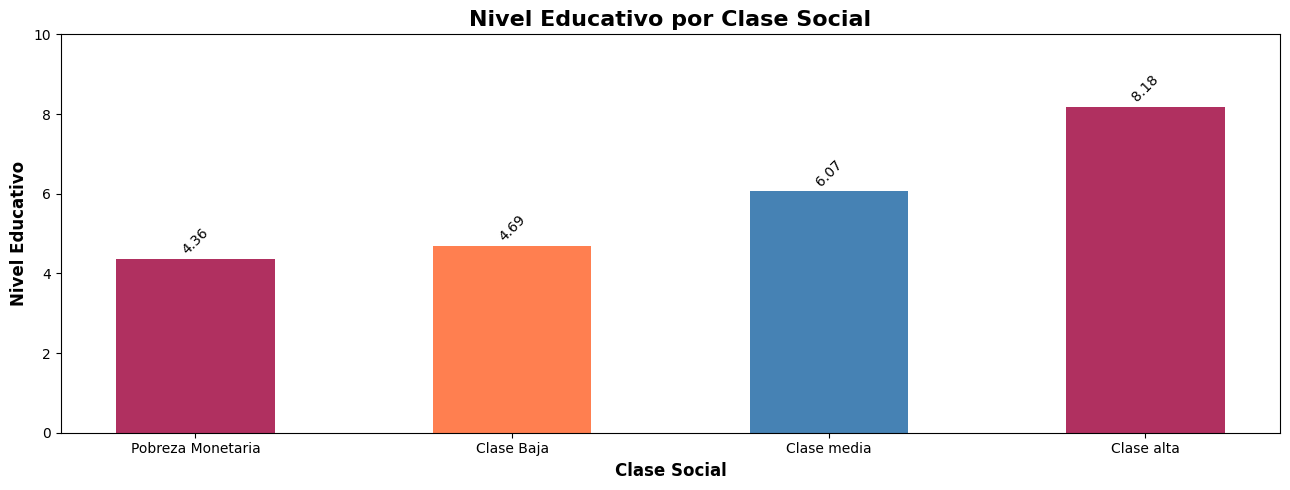

In [72]:
x_map = {clase: i for i, clase in enumerate(df_educativo['CLASE_SOCIAL'])}  
df_educativo['X_POS'] = df_educativo['CLASE_SOCIAL'].map(x_map)
color = ['#B03060', '#FF7F50', '#4682B4']


plt.figure(figsize=(13, 5))
plt.bar(df_educativo ['X_POS'], df_educativo['media_Nivel_Educativo'], color=color, width=0.5)
plt.xticks(ticks=list(x_map.values()), labels=list(x_map.keys()))
plt.xlabel('Clase Social', fontsize=12, fontweight='bold')
plt.ylabel('Nivel Educativo', fontsize=12, fontweight='bold')
plt.title('Nivel Educativo por Clase Social', fontsize=16, fontweight='bold')
plt.ylim(0, 10)
plt.grid(False)
for x, y in zip(df_educativo ['X_POS'], df_educativo ['media_Nivel_Educativo']):
    plt.text(x, y * 1.01, f"{y:.2f}", ha='center', va='bottom', fontsize=10, rotation=45)

plt.tight_layout()
plt.show()

This initial analysis allows us to identify the first socioeconomic variable that significantly differentiates high-income and low-income households: education level. With this preliminary conclusion, we can also outline an effective targeting strategy for Colombian social policies aimed at reducing social inequality.


#### **Labor Variables Analysis**

In [73]:
columnas_a_transformar = ['Tipo de contrato', 'Tiene contrato', 'Fondo de pensiones', 'Trabajo estable' ,'Exigencia física o mental']
df[columnas_a_transformar] = df[columnas_a_transformar].applymap(lambda x: 1 if x == 1 else 0)

df_laboral = df.groupby('CLASE_SOCIAL').agg({
    'Meses en la empresa': 'median',
    'Horas de trabajo semanales': 'median',
    'Tiene contrato': 'mean',
    'Tipo de contrato': 'mean',
    'Fondo de pensiones': 'mean',
    'Trabajo estable':'mean',
    'Exigencia física o mental':'mean'
}).dropna().reset_index()

df_laboral

C:\Users\alejo\AppData\Local\Temp\ipykernel_18596\3345766453.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columnas_a_transformar] = df[columnas_a_transformar].applymap(lambda x: 1 if x == 1 else 0)
C:\Users\alejo\AppData\Local\Temp\ipykernel_18596\3345766453.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_laboral = df.groupby('CLASE_SOCIAL').agg({


,CLASE_SOCIAL,Meses en la empresa,Horas de trabajo semanales,Tiene contrato,Tipo de contrato,Fondo de pensiones,Trabajo estable,Exigencia física o mental
0,Pobreza Monetaria,36.0,30.0,0.203067,0.001336,0.014509,0.449281,0.164121
1,Clase Baja,24.0,48.0,0.508994,0.055027,0.145987,0.623204,0.114829
2,Clase media,36.0,48.0,0.880106,0.546516,0.863228,0.873355,0.038849
3,Clase alta,131.0,47.0,0.945730,0.859717,0.924022,0.950236,0.020070


Before analyzing these variables, recall the following conventions:
---

* **Contract type:** 1 = permanent; 0 = fixed-term  
* **Has contract:** 1 = yes; 0 = no  
* **Pension fund contribution:** 1 = contributes; 0 = does not contribute  
* **Stable employment:** 1 = yes; 0 = no  
* **Physical or mental demand:** 1 = yes; 0 = no  

With this in mind, the first thing we observe is that weekly working hours are not truly significant for distinguishing social classes. However, the other variables tell a very different story:

**Contract Type:**  
Upper-class individuals overwhelmingly (86%) hold permanent contracts, eliminating uncertainty about job continuity and facilitating long-term establishment in a company. As we move down the social ladder, fixed-term contracts become much more common—only 50% of middle-class workers have permanent contracts, dropping to just 5% in the lower class.

**Has Contract:**  
Closely tied to informality, this variable shows that 94% of upper-class families have any formal contract—most of which are permanent. The middle class is not far behind at 87%, though these contracts are less often permanent. In contrast, only 51% of the lower class and 21% of those in monetary poverty have formal contracts, and most of those are fixed-term. This indicates that the majority of lower-income households work in the informal sector.

**Pension Fund Contribution:**  
Here, too, significant differences emerge: only middle- and upper-class workers contribute to a pension fund, while lower-class workers almost never do. This starkly reveals that only those with resources can access pension benefits, whereas those who need them most have virtually no access.

**Stable Employment:**  
Perceived job security rises steadily with social class. Upper-class workers generally feel secure—reflecting their high rate of permanent contracts—whereas lower-class and especially extremely poor workers face great uncertainty about their employment future.

**Physical or Mental Demand:**  
Finally, upper-class jobs tend to be less physically and mentally demanding. In contrast, lower-class occupations often impose heavy physical strain or mental stress, which can jeopardize workers’ long-term health and ability to remain employed.


#### Analysis by seniority at work

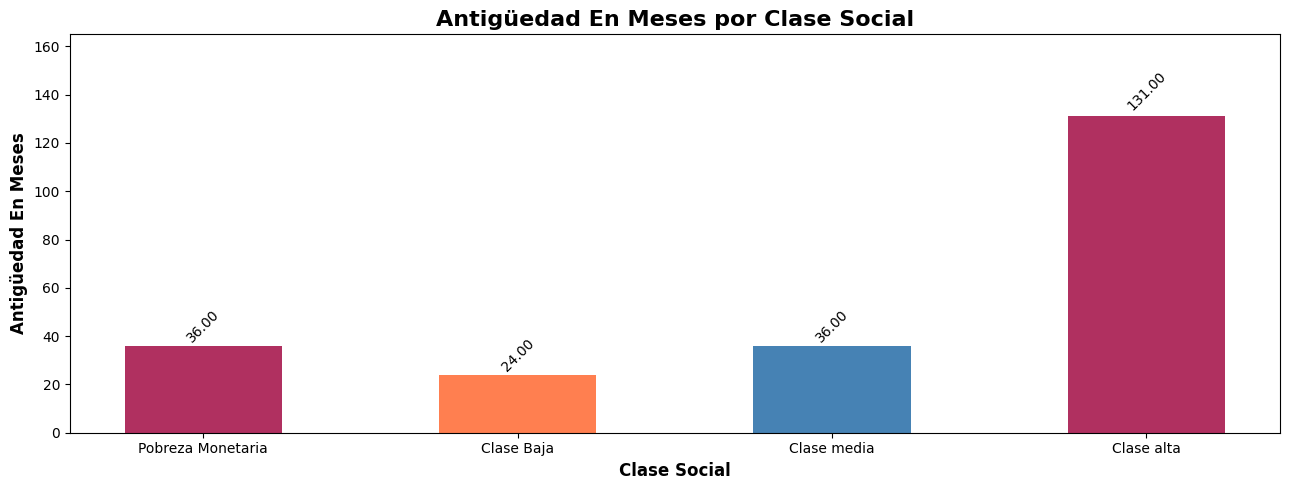

In [74]:
x_map = {clase: i for i, clase in enumerate(df_laboral ['CLASE_SOCIAL'])}  
df_laboral ['X_POS'] = df_laboral ['CLASE_SOCIAL'].map(x_map)
color = ['#B03060', '#FF7F50', '#4682B4']

plt.figure(figsize=(13, 5))
plt.bar(df_laboral  ['X_POS'], df_laboral ['Meses en la empresa'], color=color, width=0.5)
plt.xticks(ticks=list(x_map.values()), labels=list(x_map.keys()))
plt.xlabel('Clase Social', fontsize=12, fontweight='bold')
plt.ylabel('Antigüedad En Meses', fontsize=12, fontweight='bold')
plt.title('Antigüedad En Meses por Clase Social', fontsize=16, fontweight='bold')
plt.ylim(0, 165)
plt.grid(False)
for x, y in zip(df_laboral  ['X_POS'], df_laboral  ['Meses en la empresa']):
    plt.text(x, y * 1.01, f"{y:.2f}", ha='center', va='bottom', fontsize=10, rotation=45)

plt.tight_layout()
plt.show()

With this chart, we can see that, on average, workers in extreme poverty and the middle class have been with their companies for 2.9 years, while the lower class has worked, on average, 2 years in their current jobs. Finally, the upper class has an average tenure of 9.9 years.

One might think that if the lower class could simply stay longer, they could “catch up” to the upper class. However, this is a flawed analysis. What we actually observe is that the higher tenure in the upper class stems from real opportunities for internal advancement. This ties directly to the previous chart, which showed that the upper class has higher education levels—and because of that, they are qualified for promotions within their firms. In contrast, the lower class lacks the same pathways for progression and, even when opportunities exist, rarely move into specialized roles.

Supporting this view is the fact—shown in the earlier table—that most lower-class workers are in informal employment. This means they typically do not hold positions where, for example, 10 years of experience lead to advancement. Moreover, most have fixed-term contracts lasting 2–3 years, so lower- and middle-class workers often remain in the same role after 1–2 years, with no clear promotion track and the constant uncertainty of contract renewal.

The key takeaway from this chart is that the upper class’s longer tenure is not just longevity but the result of genuine promotion prospects within their organizations.


#### **Household Variables Analysis**

In [75]:
df_vivienda = df.groupby('CLASE_SOCIAL').agg({
    'Tipo de Vivienda': 'mean',
    'Cuota Amotrtizacion': 'median',
    'Arriendo': 'median',
    
}).dropna().reset_index()
df_vivienda = df_vivienda.applymap(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)
df_vivienda 

C:\Users\alejo\AppData\Local\Temp\ipykernel_18596\1793704952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vivienda = df.groupby('CLASE_SOCIAL').agg({
C:\Users\alejo\AppData\Local\Temp\ipykernel_18596\1793704952.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_vivienda = df_vivienda.applymap(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)


,CLASE_SOCIAL,Tipo de Vivienda,Cuota Amotrtizacion,Arriendo
0,Pobreza Monetaria,2.85,"500,000.00","400,000.00"
1,Clase Baja,2.80,"500,000.00","450,000.00"
2,Clase media,2.52,"700,000.00","600,000.00"
3,Clase alta,2.09,"1,400,000.00","1,000,000.00"


Here, “Housing Type” is classified as follows:

* **1) Owned, fully paid.**  
* **2) Owned, under payment.**  
* **3) Rented or sublet.**

What we observe is that even the upper class does not predominantly live in fully paid homes—although more of them are paying off their property than renting. Conversely, it is highly unlikely that those in monetary poverty or the lower class own a home; most must pay rent, which, as we saw, consumes a large share of their income.

Unsurprisingly, as social class rises, the amount paid—whether mortgage or rent—also increases, indicating that upper-class individuals reside in more expensive neighborhoods and more modern homes.


### 4.3.3 **Geographic Analysis.**

In [77]:
departamentos = df.groupby('Departamento').agg({
    'Ingresos finales': 'median',
    'Nivel Educativo': 'mean'
}).reset_index()
departamentos = departamentos.rename(columns={'Departamento':'DPTO'})

gdf = gpd.read_file("Colombia.json")
gdf['DPTO'] = gdf['DPTO'].astype(int)
departamentos['DPTO'] = departamentos['DPTO'].astype(int)
gdf = gdf.merge(departamentos[['DPTO', 'Ingresos finales' ,'Nivel Educativo']], on='DPTO' ,how='left')
gdf = gdf.iloc[:-1 , :]
gdf.head(5)

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,Ingresos finales,Nivel Educativo
0,5,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.3073 8.6193, -76.2981 8.6164, -7...",2140000.0,5.511478
1,8,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.8706 10.3612, -74.8764 10.3433, ...",1200000.0,5.250128
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.0229 4.7951, -74.0264 4.7836, -7...",2300196.0,6.282591
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.1595 10.4236, -75.1543 10.4097, ...",1000000.0,5.340442
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.213 7.0275, -72.2061 7.0246, -72...",1500000.0,6.128759


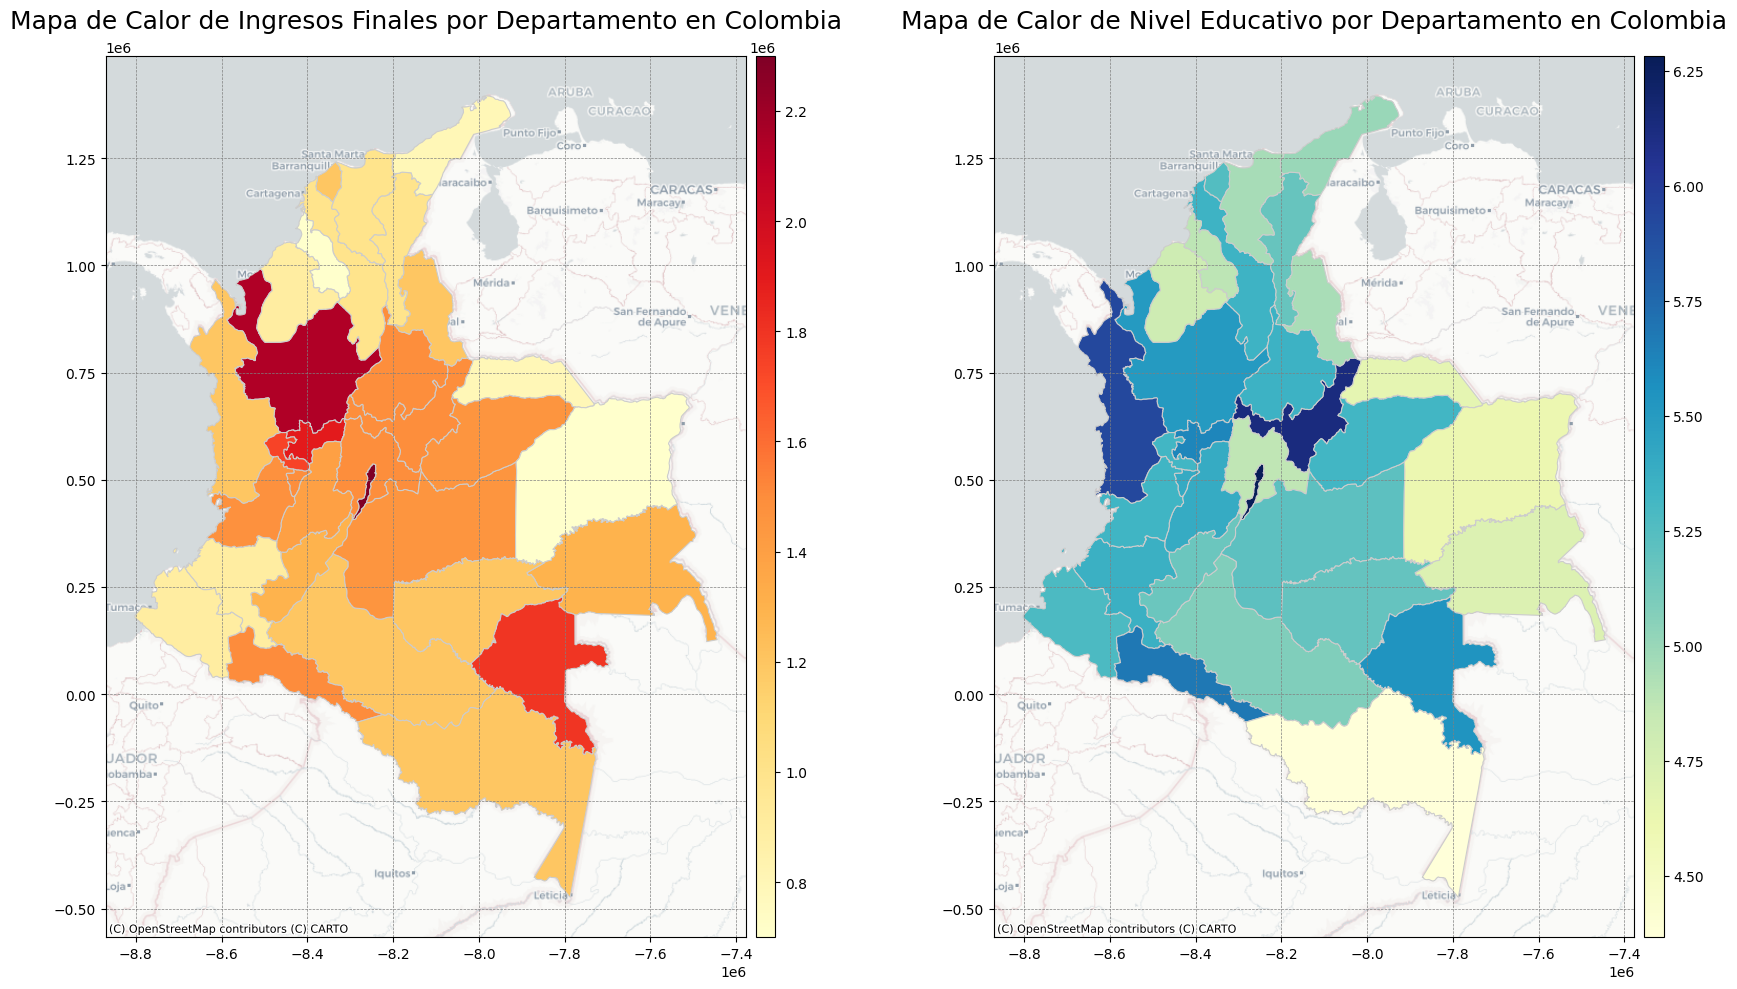

In [78]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

gdf_3857 = gdf.to_crs(epsg=3857)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="3%", pad=0.1)

gdf_3857.plot(column='Ingresos finales',cmap='YlOrRd',linewidth=0.8,edgecolor='0.8',ax=ax1,legend=True,cax=cax1)

ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax1.set_title("Mapa de Calor de Ingresos Finales por Departamento en Colombia", fontsize=18, pad=20)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="3%", pad=0.1)

gdf_3857.plot(column='Nivel Educativo',cmap='YlGnBu',linewidth=0.8,edgecolor='0.8', ax=ax2,legend=True,cax=cax2)

ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron)
ax2.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax2.set_title("Mapa de Calor de Nivel Educativo por Departamento en Colombia", fontsize=18, pad=20)

plt.tight_layout()
plt.show()

With this heatmap, we can see that the highest incomes are concentrated mainly in the departments of Bogotá D.C., Antioquia, Caldas, and Risaralda—each in the range of 1.9 to 2.4 million COP. In contrast, the poorest departments in monetary terms are Vichada, Cauca, and most of the Caribbean region (La Guajira, Magdalena, Sucre, and Córdoba).

However, the education chart reveals that some departments with high education levels do not show equally high incomes. A clear example is Chocó: in the right‐hand plot, Chocó matches Antioquia’s education level but does not achieve the same income level, whereas Caldas has a lower education level than Chocó but higher incomes.

The Chocó–Antioquia discrepancy is easily explained by the presence of Medellín in Antioquia—the country’s second‐largest city, responsible for 12% of GDP. Medellín is why Antioquia’s incomes exceed Chocó’s. The situation becomes more interesting, however, when comparing Caldas or other Andean regions with Chocó.

Overall, Chocó has a higher education level than some Andean areas but lower incomes. The two main reasons are:

* **First reason:** The differences center on completing full secondary education (level 5.8) versus only up to ninth grade (level 5.5). As we saw in the education analysis, true income gains occur when one attains university or technical qualifications (levels 8–10).
* **Second reason:** Chocó faces severe institutional weaknesses and corruption, preventing formal labor opportunities. It is of little benefit that, on average, everyone there completes secondary school if there are neither facilities nor formal jobs—forcing most into informality.


#### **Geographic Analysis by Regions of the Country**.

In [79]:
departamentos_por_region = {
    "Caribe": ["ATLANTICO", "BOLIVAR", "CESAR", "CORDOBA", "LA GUAJIRA", "MAGDALENA", "SUCRE"],
    "Pacífico": ["CAUCA", "CHOCO", "NARIÑO", "VALLE DEL CAUCA"],
    "Andes": ["ANTIOQUIA", "BOYACA", "CALDAS", "CUNDINAMARCA", "HUILA",
              "NORTE DE SANTANDER", "QUINDIO", "RISARALDA", "SANTANDER", "TOLIMA" ,'SANTAFE DE BOGOTA D.C'],
    "Orinoquía": ["ARAUCA", "CASANARE", "META", "VICHADA"],
    "Amazonía": ["AMAZONAS", "CAQUETA", "GUAINIA", "GUAVIARE", "PUTUMAYO", "VAUPES"]}

def asignar_region(departamento):
    for region, departamentos in departamentos_por_region.items():
        if departamento in departamentos:
            return region      
    return "Desconocido"

gdf["region"] = gdf['NOMBRE_DPT'].apply(asignar_region)
gdf1 = gdf.groupby('region')[['Ingresos finales' ,'Nivel Educativo']].median().reset_index()
gdf1

,region,Ingresos finales,Nivel Educativo
0,Amazonía,1250000.0,5.130774
1,Andes,1500000.0,5.395981
2,Caribe,1000000.0,5.000989
3,Orinoquía,1131000.0,4.939258
4,Pacífico,1050000.0,5.347037


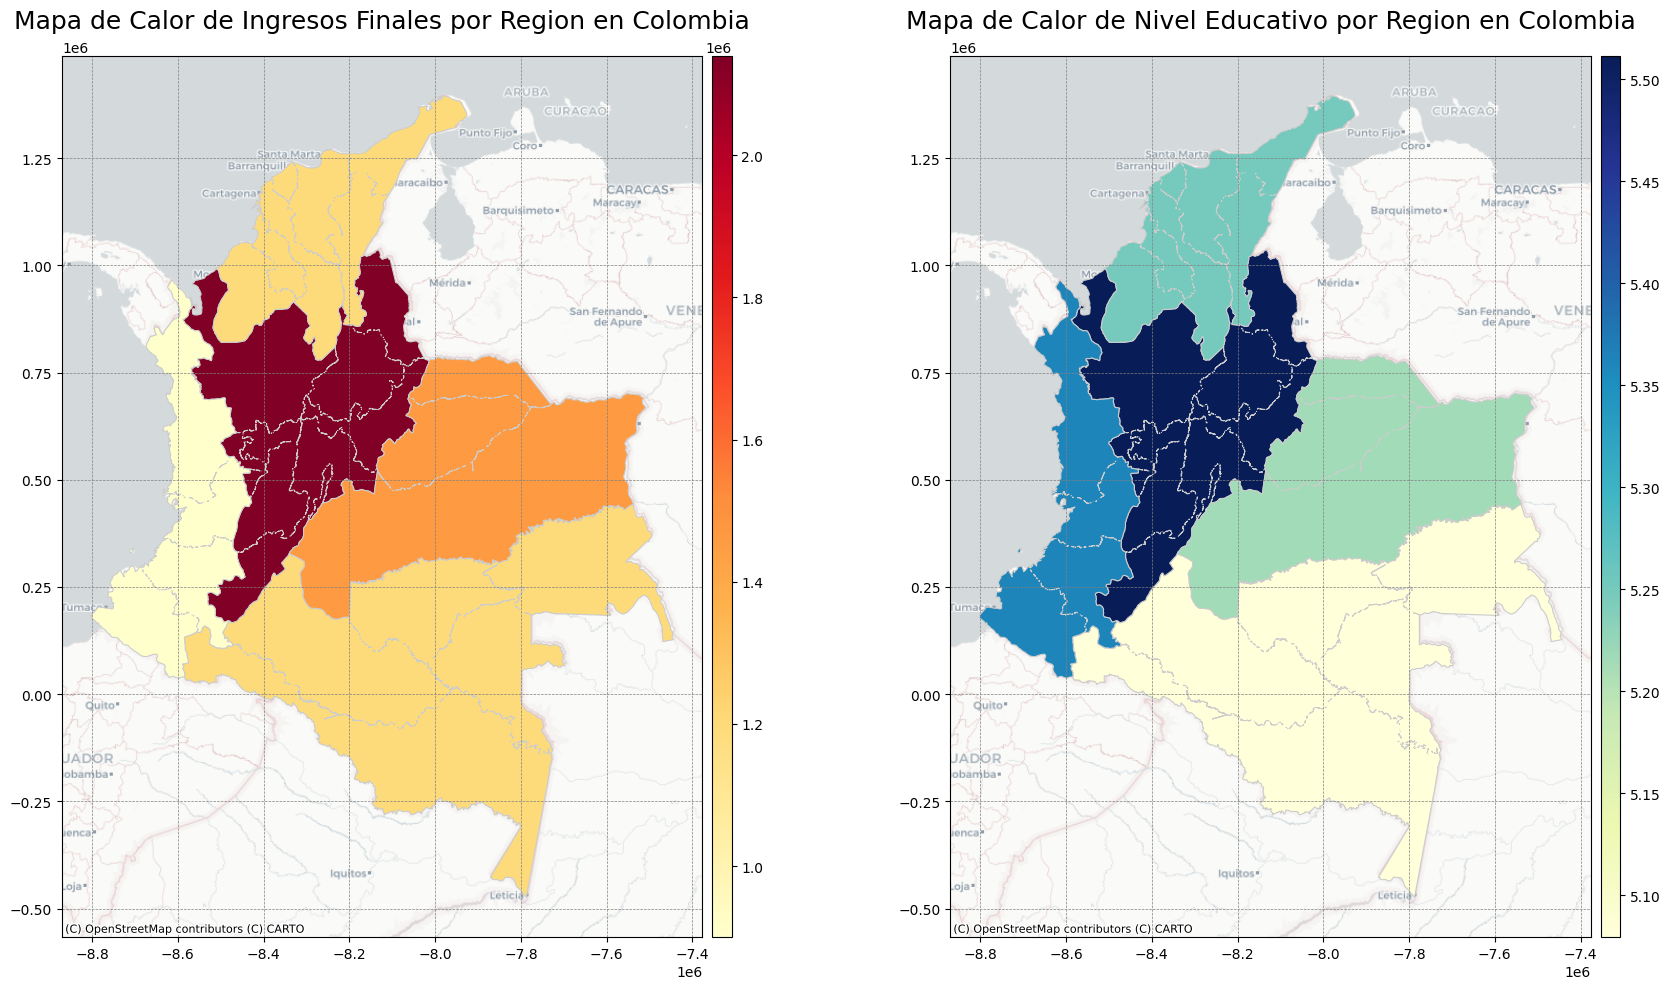

In [80]:
gdf_regiones = gdf.dissolve(by='region')

gdf_3857 = gdf_regiones.to_crs(epsg=3857)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="3%", pad=0.1)

gdf_3857.plot(column='Ingresos finales',cmap='YlOrRd',linewidth=0.8,edgecolor='0.8',ax=ax1,legend=True,cax=cax1)

ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax1.set_title("Mapa de Calor de Ingresos Finales por Region en Colombia", fontsize=18, pad=20)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="3%", pad=0.1)

gdf_3857.plot(column='Nivel Educativo',cmap='YlGnBu',linewidth=0.8, edgecolor='0.8', ax=ax2,legend=True,cax=cax2)

ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron)
ax2.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax2.set_title("Mapa de Calor de Nivel Educativo por Region en Colombia", fontsize=18, pad=20)

plt.tight_layout()
plt.show()

From this macro analysis, it is clear that the Andean region earns the highest incomes (mainly due to Bogotá, Medellín, and the cities of Boyacá), while the Pacific region accumulates the lowest incomes.

Here we observe the same dynamic we saw in Chocó, but applied across the entire Pacific zone. As shown in the maps, the Pacific region ranks second in education levels, yet it remains the poorest region. This once again underscores the structural weaknesses and corruption issues in the Pacific area, which, despite its relatively high educational attainment, fail to generate opportunities for improving living standards.


# 5. Conclusions

* The analysis of the sample’s income distribution reveals pronounced inequality in Colombia. The notable gap between the mean (2,385,617 COP) and the median (1,300,000 COP) shows that, although there are very high incomes, most households earn well below the legal minimum wage (1,462,000 COP). This right skew is confirmed by high dispersion (standard deviation of 3,693,121 COP and a range of 105 million COP). Seventy-five percent of households earn less than 2.3 million COP—a sum insufficient to cover basic needs, especially for larger families. Moreover, the large share of income devoted to housing (rent or mortgage) further reduces funds available for essentials such as food, healthcare, and education. In short, these findings not only highlight the wide gap between high- and low-income sectors but also expose structural poverty for the majority, creating a vicious cycle that hinders improvement in living standards for the most vulnerable.

* The study uncovered stark differences between high- and low-income families in Colombia across educational, labor, and housing dimensions. High-income households typically have higher education levels—university or even postgraduate—enabling them to secure formal jobs with permanent contracts, longer tenure, and regular pension contributions. They also tend to live in high-stratum neighborhoods with higher-quality, owned or in-payment housing.

  In contrast, low-income families, including those in monetary poverty, generally attain only basic secondary education. This translates into informal or fixed-term jobs with little job security, forcing these households to spend most of their limited income on basic subsistence, with no access to homeownership, savings, or investment. These families also face few opportunities for upward mobility, perpetuating the socioeconomic divide.

  Finally, the analysis showed that low-income workers perform jobs with greater physical and mental strain, making long-term employment in these roles unsustainable.

* The geographic analysis shows that high-income households cluster in the Andean region—especially Bogotá D.C., Antioquia, and Caldas—driven by major urban centers and greater employment opportunities. Conversely, departments such as Vichada, Cauca, and much of the Caribbean region have lower incomes due to structural limitations and lack of formal employment. Although regions like Chocó exhibit education levels comparable to Antioquia, their incomes remain lower because of labor informality and corruption issues. In summary, regional disparities in Colombia are strongly influenced by geographic location and each region’s ability to generate economic opportunities, underscoring the need for public policies that address these gaps.

* In light of the marked inequality and persistent poverty revealed, the State could mitigate the situation by adopting a comprehensive policy package, including:

  1. **Investing in education:** Expand and improve education—especially technical and tertiary—to enable more citizens to access formal, better-paid jobs.  
  2. **Promoting labor formalization:** Introduce incentives and reforms to encourage stable contracts and pension contributions, particularly in lagging regions.  
  3. **Fostering regional development:** Invest in infrastructure to reduce the burden of high housing, healthcare, and food costs.  
  4. **Strengthening anti-corruption efforts and institutional efficiency:** Ensure that advancement opportunities are equitable across Colombia, breaking the cycle of structural poverty.

  Implemented together, these measures could help narrow socioeconomic gaps and improve quality of life for Colombian citizens.


### Pablo Reyes